In [1]:
# EDA.ipynb
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better readability
pd.set_option('display.max_columns', None)

# Set paths
data_dir = "data"
tickers_file = os.path.join(data_dir, "crypto_tickers.json")


In [2]:
# Load tickers
with open(tickers_file, 'r') as f:
    tickers = json.load(f)

# Verify tickers list loaded
print("Crypto tickers loaded:", tickers)

# Dictionary to store all data
crypto_data = {}

# Loop through tickers and read data
for ticker in tickers:
    file_path = os.path.join(data_dir, f"{ticker}.csv")
    if not os.path.exists(file_path):
        print(f"File not found for {ticker}: {file_path}")
        continue
    
    df = pd.read_csv(file_path, parse_dates=['Date'])
    
    # Store DataFrame
    crypto_data[ticker] = df
    
    # Check for missing data
    print(f"\n{ticker} - Missing data check:")
    print(df.isnull().sum())
    
    # Check head and tail for quick validation
    print(df.head(2))
    print(df.tail(2))


Crypto tickers loaded: ['ADA-USD', 'AETHWETH-USD', 'AVAX-USD', 'BCH-USD', 'BNB-USD', 'BTC-USD', 'BTCB-USD', 'DOGE-USD', 'ETH-USD', 'HBAR-USD', 'HYPE32196-USD', 'ICP-USD', 'LEO-USD', 'LINK-USD', 'LTC-USD', 'SHIB-USD', 'SOL-USD', 'STETH-USD', 'SUI20947-USD', 'TON11419-USD', 'TRX-USD', 'USDC-USD', 'USDS33039-USD', 'USDT-USD', 'WBETH-USD', 'WBTC-USD', 'WEETH-USD', 'WETH-USD', 'WSTETH-USD', 'WTRX-USD', 'XLM-USD', 'XRP-USD']

ADA-USD - Missing data check:
Date          0
Close         0
High          0
Low           0
Open          0
Volume        0
Log_Return    1
dtype: int64
        Date     Close      High       Low      Open     Volume  Log_Return
0 2022-01-01  1.376975  1.376975  1.309787  1.310130  851279685         NaN
1 2022-01-02  1.377584  1.388755  1.346515  1.377017  881893010    0.000442
           Date     Close      High       Low      Open      Volume  \
1245 2025-05-30  0.689327  0.727093  0.687106  0.722342  1028958874   
1246 2025-05-31  0.686074  0.694639  0.658094  0.68


Merged Close Prices - Missing data:
Date                0
ADA-USD             1
AETHWETH-USD     1228
AVAX-USD            1
BCH-USD             1
BNB-USD             1
BTC-USD             1
BTCB-USD            1
DOGE-USD            1
ETH-USD             1
HBAR-USD            1
HYPE32196-USD    1064
ICP-USD             0
LEO-USD             1
LINK-USD            1
LTC-USD             1
SHIB-USD            1
SOL-USD             1
STETH-USD           1
SUI20947-USD      488
TON11419-USD        1
TRX-USD             1
USDC-USD            1
USDS33039-USD     993
USDT-USD            1
WBETH-USD         482
WBTC-USD            1
WEETH-USD         712
WETH-USD            1
WSTETH-USD          1
WTRX-USD           64
XLM-USD             1
XRP-USD             1
dtype: int64


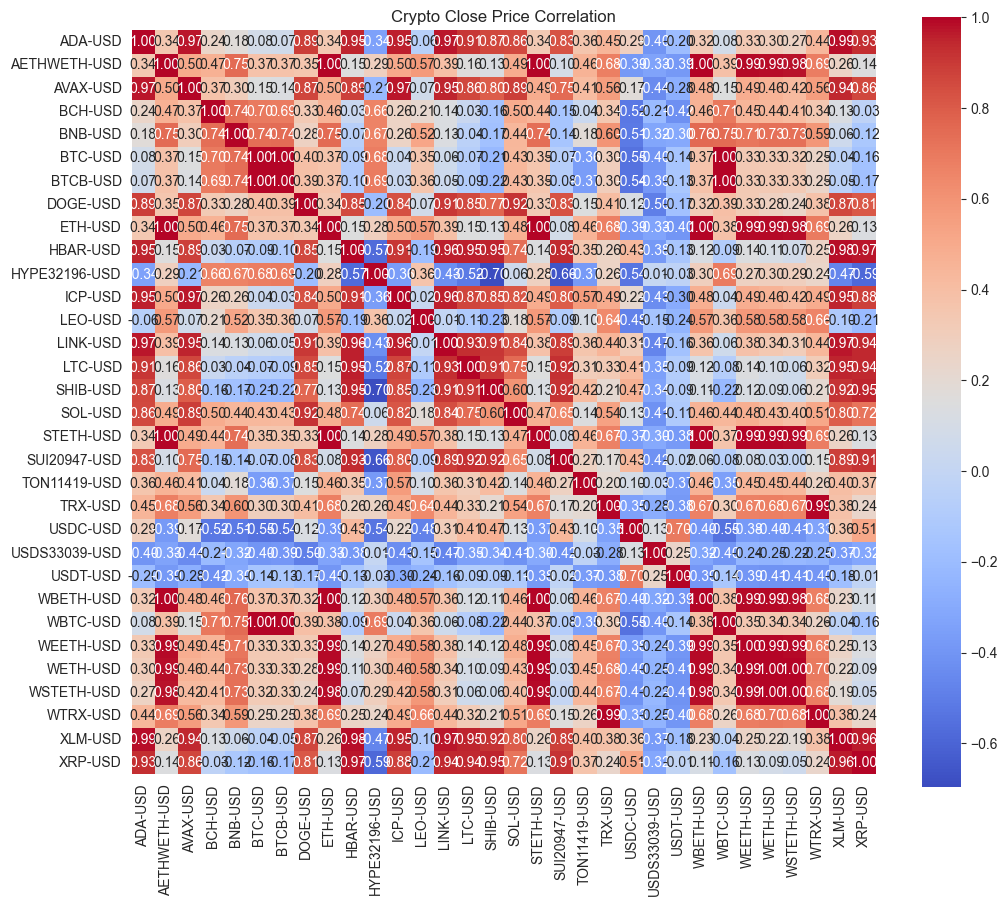

In [3]:
close_prices = pd.DataFrame()

for ticker, df in crypto_data.items():
    tmp = df[['Date', 'Close']].copy()
    tmp.rename(columns={'Close': ticker}, inplace=True)
    
    if close_prices.empty:
        close_prices = tmp
    else:
        close_prices = pd.merge(close_prices, tmp, on='Date', how='outer')

# Sort by date
close_prices.sort_values('Date', inplace=True)

# Check missing values after merge
print("\nMerged Close Prices - Missing data:")
print(close_prices.isnull().sum())

# Drop rows with any missing values for correlation analysis
corr_data = close_prices.dropna().set_index('Date')

# Compute correlation
corr = corr_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Crypto Close Price Correlation")
plt.show()

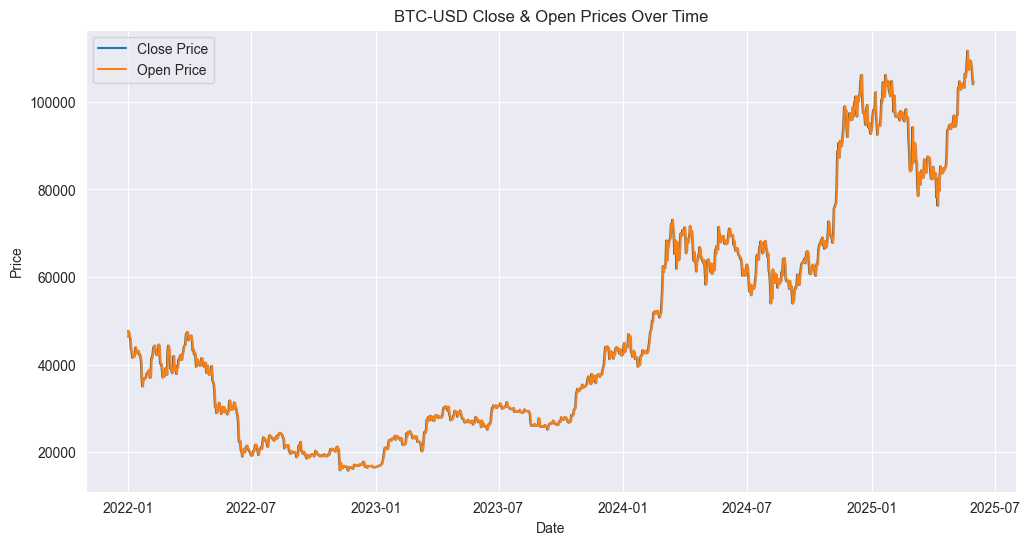

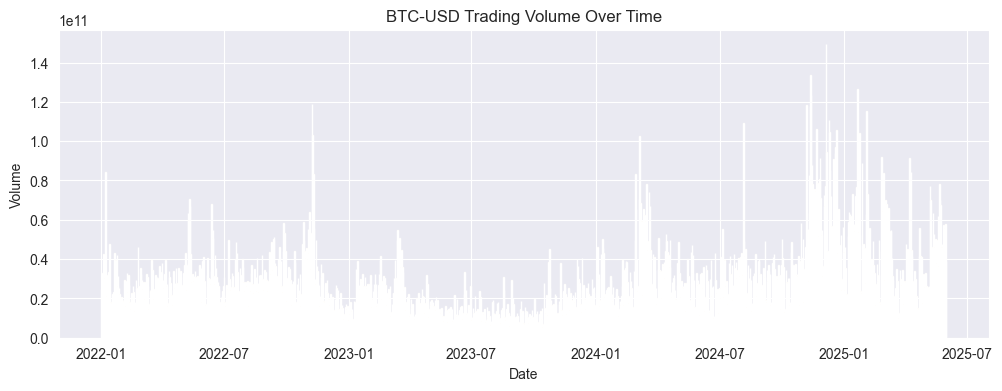

In [4]:
# BTC-USD plots

btc_df = crypto_data.get('BTC-USD')

if btc_df is not None:
    plt.figure(figsize=(12, 6))
    plt.plot(btc_df['Date'], btc_df['Close'], label='Close Price')
    plt.plot(btc_df['Date'], btc_df['Open'], label='Open Price')
    plt.title("BTC-USD Close & Open Prices Over Time")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 4))
    plt.bar(btc_df['Date'], btc_df['Volume'], color='orange')
    plt.title("BTC-USD Trading Volume Over Time")
    plt.xlabel("Date")
    plt.ylabel("Volume")
    plt.show()
else:
    print("BTC-USD data not found.")

Selected tickers for correlation: ['ADA-USD', 'AETHWETH-USD', 'AVAX-USD', 'BCH-USD', 'BNB-USD', 'BTC-USD', 'BTCB-USD', 'DOGE-USD', 'ETH-USD', 'HBAR-USD']

ADA-USD - Missing data check:
Date          0
Close         0
High          0
Low           0
Open          0
Volume        0
Log_Return    1
dtype: int64
        Date     Close      High       Low      Open     Volume  Log_Return
0 2022-01-01  1.376975  1.376975  1.309787  1.310130  851279685         NaN
1 2022-01-02  1.377584  1.388755  1.346515  1.377017  881893010    0.000442
           Date     Close      High       Low      Open      Volume  \
1245 2025-05-30  0.689327  0.727093  0.687106  0.722342  1028958874   
1246 2025-05-31  0.686074  0.694639  0.658094  0.689330   812725496   

      Log_Return  
1245   -0.046783  
1246   -0.004730  

AETHWETH-USD - Missing data check:
Date          0
Close         0
High          0
Low           0
Open          0
Volume        0
Log_Return    1
dtype: int64
        Date        Close     

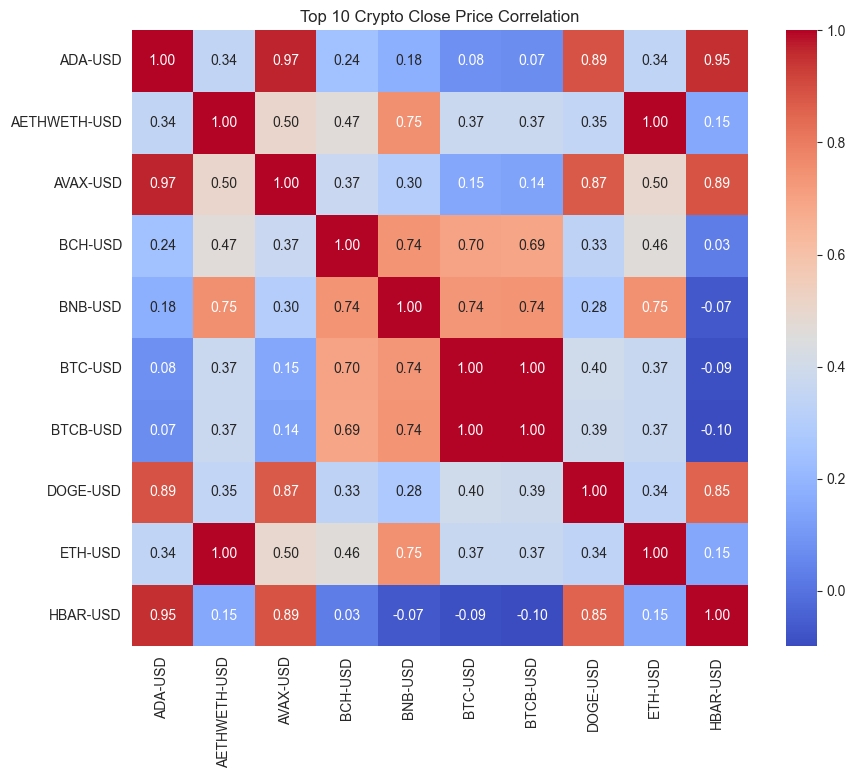

In [5]:
# Take only first 10 tickers
top_n = 10
selected_tickers = tickers[:top_n]
print(f"Selected tickers for correlation: {selected_tickers}")

# Dictionary to store data only for selected tickers
selected_crypto_data = {}

for ticker in selected_tickers:
    file_path = os.path.join(data_dir, f"{ticker}.csv")
    if not os.path.exists(file_path):
        print(f"File not found for {ticker}: {file_path}")
        continue
    
    df = pd.read_csv(file_path, parse_dates=['Date'])
    
    selected_crypto_data[ticker] = df
    
    # Missing data check
    print(f"\n{ticker} - Missing data check:")
    print(df.isnull().sum())
    print(df.head(2))
    print(df.tail(2))

# Build merged dataframe for correlation
close_prices = pd.DataFrame()

for ticker, df in selected_crypto_data.items():
    tmp = df[['Date', 'Close']].copy()
    tmp.rename(columns={'Close': ticker}, inplace=True)
    
    if close_prices.empty:
        close_prices = tmp
    else:
        close_prices = pd.merge(close_prices, tmp, on='Date', how='outer')

# Sort and drop missing rows
close_prices.sort_values('Date', inplace=True)
corr_data = close_prices.dropna().set_index('Date')
corr = corr_data.corr()

# Correlation heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title(f"Top {top_n} Crypto Close Price Correlation")
plt.show()



=== Data Quality Summary ===
           Ticker  Total Rows  Missing Values Data Status
0         ADA-USD        1247               0       Clean
1    AETHWETH-USD          20               0       Clean
2        AVAX-USD        1247               0       Clean
3         BCH-USD        1247               0       Clean
4         BNB-USD        1247               0       Clean
5         BTC-USD        1247               0       Clean
6        BTCB-USD        1247               0       Clean
7        DOGE-USD        1247               0       Clean
8         ETH-USD        1247               0       Clean
9        HBAR-USD        1247               0       Clean
10  HYPE32196-USD         184               0       Clean
11        ICP-USD        1248               0       Clean
12        LEO-USD        1247               0       Clean
13       LINK-USD        1247               0       Clean
14        LTC-USD        1247               0       Clean
15       SHIB-USD        1247             

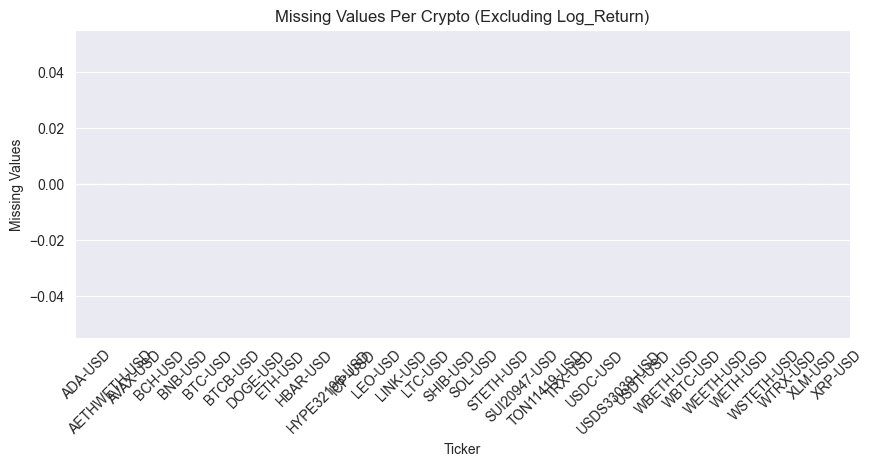

In [6]:
# Data quality check for all tickers (ignore 'Log_Return')
quality_check = []

for ticker in tickers:
    file_path = os.path.join(data_dir, f"{ticker}.csv")
    if not os.path.exists(file_path):
        print(f"File not found for {ticker}: {file_path}")
        continue
    
    df = pd.read_csv(file_path, parse_dates=['Date'])
    
    # Drop 'Log_Return' from check
    cols_to_check = [col for col in df.columns if col != 'Log_Return']
    missing_counts = df[cols_to_check].isnull().sum().sum()
    total_rows = df.shape[0]
    
    quality_check.append({
        'Ticker': ticker,
        'Total Rows': total_rows,
        'Missing Values': missing_counts,
        'Data Status': 'Clean' if missing_counts == 0 else 'Has Missing'
    })

# Convert to dataframe for better display
quality_df = pd.DataFrame(quality_check)
print("\n=== Data Quality Summary ===")
print(quality_df)

# Optional: plot quick bar chart
plt.figure(figsize=(10, 4))
sns.barplot(x='Ticker', y='Missing Values', data=quality_df)
plt.title("Missing Values Per Crypto (Excluding Log_Return)")
plt.xticks(rotation=45)
plt.show()


Best ARIMA order: (4, 1, 5) with AIC: 21669.865192099896


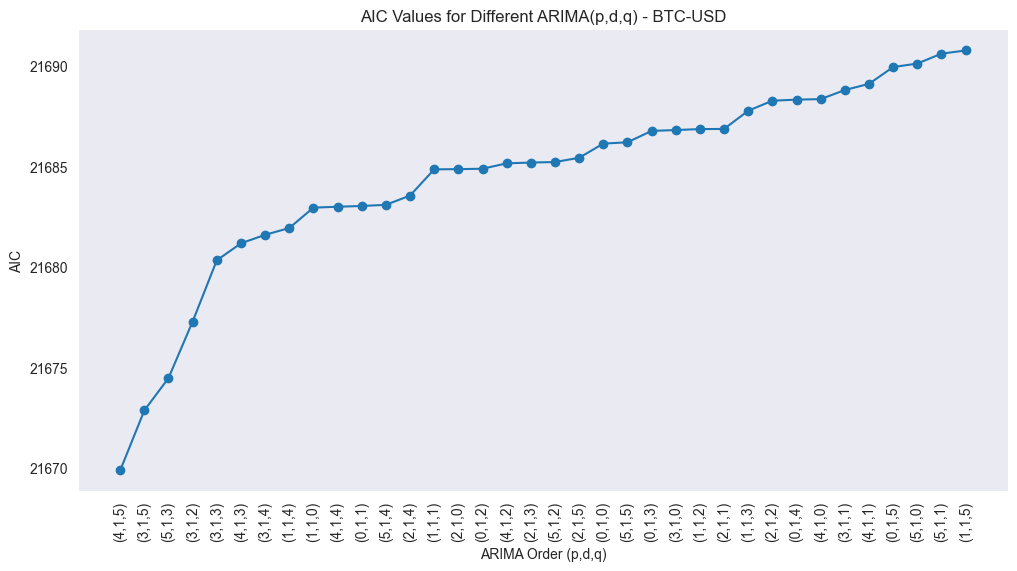

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import itertools
from statsmodels.tsa.arima.model import ARIMA

# Suppress warnings
warnings.filterwarnings('ignore')

# Example: load one crypto
ticker = 'BTC-USD'
file_path = os.path.join(data_dir, f"{ticker}.csv")
df_crypto = pd.read_csv(file_path, parse_dates=['Date'])
df_crypto.set_index('Date', inplace=True)

# Focus on Close price
y = df_crypto['Close'].dropna()

# Set d=1 (first difference) commonly for financial time series
d = 1

# Set p and q range (0 to 5 for example)
p = q = range(0, 6)

# Create a list of all possible (p, d, q) combinations
pdq = list(itertools.product(p, [d], q))

# For storing results
aic_values = []

# Loop through combinations
for param in pdq:
    try:
        model = ARIMA(y, order=param)
        model_fit = model.fit()
        aic = model_fit.aic
        aic_values.append((param, aic))
    except:
        continue

# Sort by AIC
aic_values.sort(key=lambda x: x[1])

# Print best model
print(f"Best ARIMA order: {aic_values[0][0]} with AIC: {aic_values[0][1]}")

# Plotting AIC values
orders = [f"({p},{d},{q})" for (p, d, q), aic in aic_values]
aics = [aic for (order, aic) in aic_values]

plt.figure(figsize=(12, 6))
plt.plot(orders, aics, marker='o')
plt.xticks(rotation=90)
plt.xlabel('ARIMA Order (p,d,q)')
plt.ylabel('AIC')
plt.title(f'AIC Values for Different ARIMA(p,d,q) - {ticker}')
plt.grid()
plt.show()
